In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statistics

In [2]:
## USP Certain Metallicity

filename = "ajaa7b7ct1_ascii.csv"

uspdata = np.genfromtxt(filename, delimiter = ",", skip_header = 5, 
                     names = ["ID", "T_eff", "Teff_upper_unc", "Teff_lower_unc", 
                               "logg", "logg_upper_unc", "logg_lower_unc", 
                               "metal", "metal_upper_unc", "metal_lower_unc", 
                               "R_sstar", "R_sstar_upper_unc", "R_sstar_lower_unc", 
                               "M_sstar", "M_sstar_upper_unc", "M_sstar_lower_unc", 
                               "R_p", "R_p_upper_unc", "R_p_lower_unc", "P_orb"], dtype=None)
print(uspdata["metal"])
print(uspdata["metal_upper_unc"])
print(uspdata["metal_lower_unc"])
print()
print(len(uspdata["metal"]))

[-0.11  0.1   0.11  0.31 -0.04  0.1   0.11 -0.04  0.03 -0.1  -0.08 -0.11
  0.39 -0.07  0.17 -0.11  0.25  0.38  0.02  0.18  0.32  0.11  0.12  0.16
 -0.06  0.1  -0.59 -0.31 -0.07  0.25  0.2  -0.04  0.23  0.21  0.1  -0.01
  0.   -0.08 -0.09 -0.01  0.    0.17  0.36  0.    0.13  0.14  0.18  0.2
 -0.01  0.07  0.11  0.25 -0.11  0.12 -0.12 -0.11  0.1   0.06  0.07  0.08
 -0.01  0.   -0.09  0.12]
[0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04
 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04
 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04
 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04
 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04]
[0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04
 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04
 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04
 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04


C:\Users\Ciera\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  # This is added back by InteractiveShellApp.init_path()


In [3]:
## Hot Jupiter Certain Metallicity

filename = "ajaa7b7ct2_ascii.csv"

hjdata = np.genfromtxt(filename, delimiter = ",", skip_header = 5, 
                     names = ["ID", "T_eff", "Teff_upper_unc", "Teff_lower_unc", 
                               "logg", "logg_upper_unc", "logg_lower_unc", 
                               "metal", "metal_upper_unc", "metal_lower_unc", 
                               "R_sstar", "R_sstar_upper_unc", "R_sstar_lower_unc", 
                               "M_sstar", "M_sstar_upper_unc", "M_sstar_lower_unc", 
                               "R_p", "R_p_upper_unc", "R_p_lower_unc", "P_orb"], dtype=None)
print(hjdata["metal"])
print()
print(len(hjdata["metal"]))

[ 0.01  0.31  0.17  0.34  0.2   0.23  0.35  0.25  0.32  0.3   0.18 -0.16
  0.35  0.31  0.39  0.32  0.04  0.09  0.2   0.22  0.3   0.07  0.03]

23


C:\Users\Ciera\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  # This is added back by InteractiveShellApp.init_path()


In [4]:
this_many_times = 1000
ks_list = []

for number in range(this_many_times):
    
    usp_bootstrap_result_list = []
    hj_bootstrap_result_list = []

## USP Resampling
    for data_point in uspdata["metal"]:
        rand_result = np.random.uniform(-0.04, 0.041)
        usp_bootstrap_data_point = data_point+rand_result
        usp_bootstrap_result_list.append(usp_bootstrap_data_point)

## HJ Resampling
    for data_point in hjdata["metal"]:
        rand_result = np.random.uniform(-0.04, 0.041)
        hj_bootstrap_data_point = data_point + rand_result
        hj_bootstrap_result_list.append(hj_bootstrap_data_point)

## KS Test on those lists
    _, pvalue = stats.ks_2samp(usp_bootstrap_result_list, hj_bootstrap_result_list)
    ks_list.append(pvalue)
    
print(len(usp_bootstrap_result_list)) 
print(len(hj_bootstrap_result_list))
print(len(ks_list))

64
23
1000


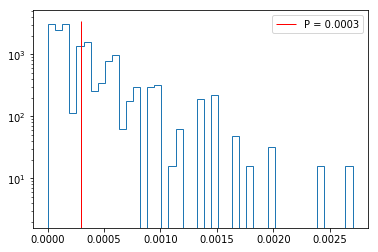

In [5]:
ks_graph = plt.hist(ks_list, bins = "auto", density = True, histtype = "step", log=True)
vertical_line = plt.vlines(.0003, 0, 3500, colors = "r", linewidth = 1, label = "P = 0.0003")
plt.legend()

In [6]:
## Changing some lists to arrays

usp_bootstrap_result_array = np.asarray(usp_bootstrap_result_list)
hj_bootstrap_result_array = np.asarray(hj_bootstrap_result_list)

In [7]:
## Sneaking Gaussian error'd HJ metallicity data points into the USP metallicity data.


#Using the hj_bootstrap_result_array because we want gauss-error'd hj data
print("Elems in usp array: " + str(len(usp_bootstrap_result_array)))

## SPECIFIC ELEMENTS MOVED (not just added) FROM GAUSSIAN HJ TO USP
this_many_elems = 1
usp_elem = np.random.choice(usp_bootstrap_result_array, this_many_elems)
hj_elem = np.random.choice(hj_bootstrap_result_array, this_many_elems)

usp_bootstrap_result_array = np.delete(usp_bootstrap_result_array, usp_elem)
print("Elems in usp post deletion: " + str(len(usp_bootstrap_result_array)))

usp_bootstrap_result_array = np.append(usp_bootstrap_result_array, hj_elem)
print("Elems in usp post replacement with a hj: " + str(len(usp_bootstrap_result_array)))


print("Elems in gaussian error hj list after all that: " + str(len(hj_bootstrap_result_array)))
print()
print(usp_bootstrap_result_array)
print()
print(hj_bootstrap_result_array)

Elems in usp array: 64
Elems in usp post deletion: 63
Elems in usp post replacement with a hj: 64
Elems in gaussian error hj list after all that: 23

[ 0.12655025  0.09286792  0.32286496 -0.0265454   0.10193601  0.08472629
 -0.03616018  0.04050869 -0.131739   -0.0481112  -0.13300495  0.38315496
 -0.09135327  0.20382543 -0.11869325  0.23810545  0.38346211 -0.00637977
  0.1743066   0.31638419  0.1306404   0.12742612  0.18315487 -0.02537293
  0.08596842 -0.56545572 -0.34083945 -0.05364468  0.2416279   0.16753173
 -0.06132272  0.20270785  0.17259299  0.12610881 -0.02937629  0.02494664
 -0.07860647 -0.06503538 -0.0096255  -0.01497335  0.18345096  0.37511924
 -0.00773522  0.14320541  0.11811672  0.17737182  0.2151247  -0.00343369
  0.04103892  0.13317889  0.26545709 -0.12917887  0.13656656 -0.15264723
 -0.09843331  0.12956787  0.05667431  0.05638342  0.04721373 -0.02147114
 -0.03632327 -0.07779284  0.09003869  0.18657418]

[-0.00104552  0.28247493  0.18657418  0.36208826  0.22905792  0.24744

C:\Users\Ciera\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  if sys.path[0] == '':


In [8]:
## "THOUSAND TIMES" PROCESS POST SNEAKING HJ INTO USP    ## This is the second time we're resampling. Wouldn't we now have an uncertainty^2? 
## No need to resample the HJ's again, since we didn't change them

this_many_times = 1000
sneaky_ks_list = []

for number in range(this_many_times):
    
    sneaky_usp_bootstrap_result_list = []
    
## USP Resampling post sneaking
    for data_point in usp_bootstrap_result_array:
        rand_result = np.random.uniform(-0.04, 0.041)
        usp_bootstrap_data_point = data_point+rand_result
        sneaky_usp_bootstrap_result_list.append(usp_bootstrap_data_point)

        
## KS Test on sneaky_usp_bootstrap and gaussian error'd hj's
    _, pvalue = stats.ks_2samp(sneaky_usp_bootstrap_result_list, hj_bootstrap_result_array)
    sneaky_ks_list.append(pvalue)
    
sneaky_usp_bootstrap_result_array = np.asarray(sneaky_usp_bootstrap_result_list)
print(len(sneaky_usp_bootstrap_result_array)) 
print(len(hj_bootstrap_result_array))
print(len(sneaky_ks_list))

64
23
1000


Maximum: 0.0027032089542467245
Median: 0.00019269215512900245
Mode: 0.00019269215512900245


Text(0.5, 1.0, 'Original KS-Test Graph')

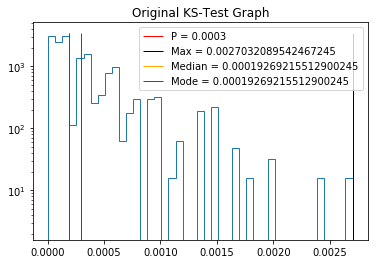

In [9]:
## Original ks_graph printed again for comparison
ks_graph = plt.hist(ks_list, bins = "auto", density = True, histtype = "step", log=True)

print("Maximum: " + str(max(ks_list)))
print("Median: " + str(statistics.median(ks_list)))
ks_mode = statistics.mode(ks_list)
print("Mode: " + str(ks_mode))

winn_p_value = plt.vlines(.0003, 0, 3500, colors = "r", linewidth = 1, label = "P = 0.0003")
max_line = plt.vlines(max(ks_list), 0, 3500, colors = "black", linewidth = 1, label = "Max = "+str(max(ks_list)))
med_line = plt.vlines(statistics.median(ks_list), 0, 3500, colors = "orange", linewidth = 1, label = "Median = "+str(statistics.median(ks_list)))
mode_line = plt.vlines(ks_mode, 0, 3500, colors = "g", linewidth = 1, label = "Mode = " + str(ks_mode))

plt.legend()
plt.title("Original KS-Test Graph")

Maximum: 0.0014802265867766853
Median: 0.0002827756088679412
Mode: 0.00019269215512900245


Text(0.5, 1.0, '1 HJ Data Points Moved to USP Data\nScale Adjusted for Readability')

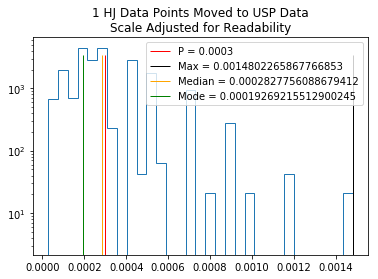

In [10]:
## Graph post sneaky hj data points
sneaky_ks_graph = plt.hist(sneaky_ks_list, bins = "auto", density = True, histtype = "step", log=True)

print("Maximum: " + str(max(sneaky_ks_list)))
print("Median: " + str(statistics.median(sneaky_ks_list)))
sneaky_ks_mode = statistics.mode(ks_list)
print("Mode: " + str(sneaky_ks_mode))

winn_p_value = plt.vlines(.0003, 0, 3500, colors = "r", linewidth = 1, label = "P = 0.0003")
max_line = plt.vlines(max(sneaky_ks_list), 0, 3500, colors = "black", linewidth = 1, label = "Max = "+str(max(sneaky_ks_list)))
med_line = plt.vlines(statistics.median(sneaky_ks_list), 0, 3500, colors = "orange", linewidth = 1, label = "Median = "+str(statistics.median(sneaky_ks_list)))
mode_line = plt.vlines(sneaky_ks_mode, 0, 3500, colors = "g", linewidth = 1, label = "Mode = " + str(sneaky_ks_mode))

plt.legend()
title_string = str(this_many_elems) + " HJ Data Points Moved to USP Data\nScale Adjusted for Readability"
plt.title(title_string)